<a href="https://colab.research.google.com/github/yuy8146/datayouthcampus2021/blob/master/ML/5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 의사결정 나무 실습

python의 scikit-learn 패키지를 이용해 의사결정 나무를 직접 실행해보자.

### 데이터 불러오기 및 분할하기

로지스틱 회귀분석과 SVM 때 사용했던 [cancer dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset)을 그대로 사용하자.

In [ ]:
from sklearn import datasets
import numpy as np
data = datasets.load_breast_cancer()

x = data['data']
y = data['target']

print(x.shape, y.shape)

(569, 30) (569,)


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 나누기 - 6:2:2 비율
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)

(341, 30) (114, 30) (114, 30)


### 모델 학습 및 평가하기

Scikit-learn의 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier) 모델을 사용하면 수업 시간에 다루었던 의사결정 나무 모델을 만들어 볼 수 있다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 의사결정 나무 모델 학습하기
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

학습 상태를 점검하기 위해 training과 validation data에 대한 정확도 및 confusion matrix를 확인해 보자. (실습!!)

In [ ]:
# TODO: training accuracy 및 confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score

train_pred=tree.predict(x_train)
print("accuracy: ", accuracy_score(y_train, train_pred))
confusion_matrix(y_train, train_pred)

accuracy:  1.0


array([[130,   0],
       [  0, 211]])

In [ ]:
# TODO: validation accuracy 및 confusion matrix

val_pred = tree.predict(x_val)
print("accuracy: ", accuracy_score(y_val, val_pred))
confusion_matrix(y_val, val_pred)

accuracy:  0.9035087719298246


array([[33,  7],
       [ 4, 70]])

수업 시간에 배웠던 내용을 떠올리며, training과 validation 성능의 차이를 줄일 수 있는 간단한 방법을 생각해 보자.

train accuracy:  1.0
[[130   0]
 [  0 211]]
vali accuracy:  0.9473684210526315
[[38  2]
 [ 4 70]]


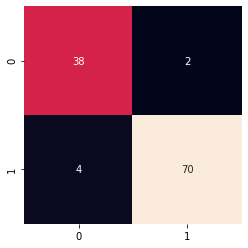

In [ ]:
# TODO: 보다 좋은 의사결정 나무 모델 만들기
import seaborn as sns

new_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3) 
new_tree.fit(x_train, y_train)

new_train_pred = new_tree.predict(x_train)
print("train accuracy: ", accuracy_score(y_train, train_pred))
print(confusion_matrix(y_train, train_pred))

new_val_pred = new_tree.predict(x_val)
print("vali accuracy: ", accuracy_score(y_val, new_val_pred))
mat = confusion_matrix(y_val, new_val_pred)
print(mat)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)